Number of stocks to analyze: 2
Enter the (official) ticker of stock number 1: TSLA
Enter the (official) ticker of stock number 2: CNP
Enter the start date of the analysis period in the format YYYY-MM-DD: 2014-1-1
Enter the end date of the analysis period in the format YYYY-MM-DD: 2016-12-31


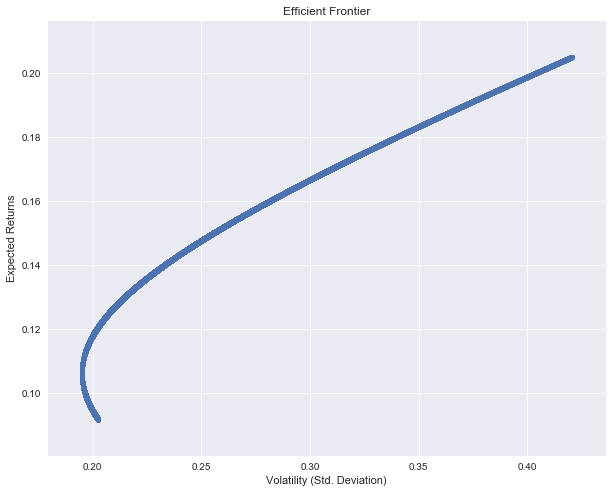

In [9]:
# import needed modules
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# get user's desired stocks
n = int(input('Number of stocks to analyze: '))
stocks = [] 
for i in range(n):
    stocks.append(input('Enter the (official) ticker of stock number %i: ' %(i+1)))

# sort stock in alphabetical order for calculation's sake
stocks.sort()

# get user's desired period of analysis
start_date = input("Enter the start date of the analysis period in the format YYYY-MM-DD: ")
end_date = input("Enter the end date of the analysis period in the format YYYY-MM-DD: ")

# download adjusted closing price for each stock from Yahoo Finance
data = web.DataReader(stocks, data_source='yahoo', start=start_date, end=end_date)['Adj Close']
data.sort_index(inplace=True)

# calculate daily and annual returns of the stocks
returns_daily = data.pct_change()
returns_annual = returns_daily.mean()*250

# get daily and annual covariance of returns of the stocks
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# create empty lists to store returns, volatility and weights of random portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for random portfolios
num_assets = len(stocks)
num_portfolios = 50000

# calculate for each random portfolio return, risk(volatility) and weights; and store the results in the corresponding list 
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# set a dictionary for returns and risk(volatility) of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend the dictionary to accomodate each ticker and weight in the portfolio
for counter, symbol in enumerate(stocks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in stocks]

# reorder dataframe columns
df = df[column_order]

# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

Number of stocks to analyze: 5
Enter the ticker of stock number 1: F
Enter the ticker of stock number 2: TSLA
Enter the ticker of stock number 3: WMT
Enter the ticker of stock number 4: CNP
Enter the ticker of stock number 5: GE
Enter the start date of the analysis period in the format YYYY-MM-DD: 2014-1-1
Enter the end date of the analysis period in the format YYYY-MM-DD: 2016-12-31


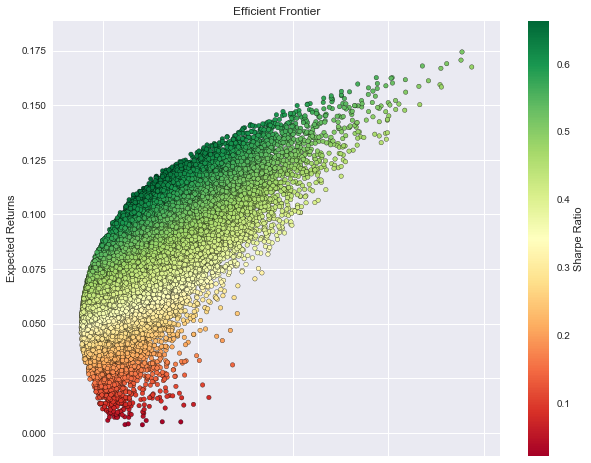

In [10]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get user's desired stocks
n = int(input("Number of stocks to analyze: "))
stocks = [] 
for i in range(n):
    stocks.append(input('Enter the ticker of stock number %i: ' %(i+1)))

# sort stock in alphabetical order for calculation's sake
stocks.sort()

# get user's desired period of analysis
start_date = input("Enter the start date of the analysis period in the format YYYY-MM-DD: ")
end_date = input("Enter the end date of the analysis period in the format YYYY-MM-DD: ")

# download adjusted closing price for each stock from Yahoo Finance
data = web.DataReader(stocks, data_source='yahoo', start=start_date, end=end_date)['Adj Close']
data.sort_index(inplace=True)

# calculate daily and annual returns of the stocks
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and annual covariance of returns of the stocks
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# create empty lists to store returns, volatility, sharpe ratio and weights of random portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for random portfolios
num_assets = len(stocks)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# calculate for each random portfolio return, risk(volatility), sharpe ratio and weights; and store the results in the corresponding list 
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# set a dictionary for returns, risk(volatility) and sharpe ratio of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend the dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(stocks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in stocks]

# reorder dataframe columns
df = df[column_order]

# plot the efficient frontier with a scatter plot coloured by the sharpe Ratio
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

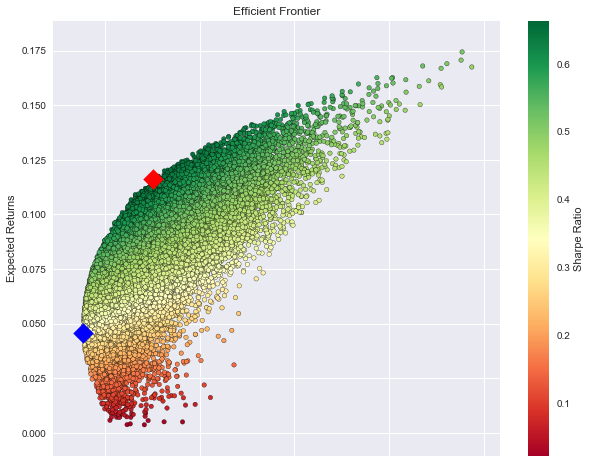

                 17879
Returns       0.045886
Volatility    0.138624
Sharpe Ratio  0.331013
CNP Weight    0.240327
F Weight      0.104659
GE Weight     0.257760
TSLA Weight   0.001487
WMT Weight    0.395767
                 31209
Returns       0.116196
Volatility    0.175156
Sharpe Ratio  0.663386
CNP Weight    0.372890
F Weight      0.008482
GE Weight     0.404987
TSLA Weight   0.211450
WMT Weight    0.002190


In [11]:
# find the min-volatility & max-sharpe ratio values in the dataframe
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min & max values to locate and create the two portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot the efficient frontier with a scatter plot coloured by the sharpe Ratio, higlighting the min-volatility & max-sharpe ratio portfolios
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

# print the details of the two desired portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)